In [44]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Loading the data

In [2]:
path= "grab-posis-citySingapore/city=Singapore/"

In [3]:
finalDF =pd.DataFrame()
for item in os.listdir(path):
    print(item)
    data = pd.read_parquet(path+item)
    if finalDF.empty:
        finalDF = data
    else:
        finalDF = finalDF.append(data)

part-00003-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet
part-00009-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet
part-00001-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet
part-00005-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet
part-00002-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet
part-00006-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet
part-00007-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet
part-00000-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet
part-00008-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet
part-00004-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet


In [5]:
len(finalDF.trj_id.unique())

28000

In [6]:
finalDF['Date'] = pd.to_datetime(finalDF.pingtimestamp,unit='s')

# Converted to GeoPandas

In [7]:
SGGeo=gpd.GeoDataFrame(finalDF, geometry=gpd.points_from_xy(finalDF['rawlng'], finalDF['rawlat']))

In [8]:
SGGeo.head()

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,Date,geometry
0,68558,car,android,1555121067,1.323986,103.858309,17.907326,46,4.000,2019-04-13 02:04:27,POINT (103.85831 1.32399)
1,36948,car,ios,1555130814,1.341696,103.748458,21.260078,298,16.000,2019-04-13 04:46:54,POINT (103.74846 1.34170)
2,56077,car,ios,1555663444,1.326663,103.826176,24.860001,291,10.000,2019-04-19 08:44:04,POINT (103.82618 1.32666)
3,28481,car,android,1555890407,1.368590,103.748069,13.039229,228,10.477,2019-04-21 23:46:47,POINT (103.74807 1.36859)
4,83944,car,ios,1554964352,1.273634,103.850378,18.639999,196,10.000,2019-04-11 06:32:32,POINT (103.85038 1.27363)


# Load the 500m x 500m Hexagon

In [2]:
hexagon = gpd.read_file("hexagon500.geojson")

In [3]:
hexagon.head()

,left,top,right,bottom,id,REGION_N,geometry
0,18226.326168,33756.3343,18803.676437,33256.3343,2554,WEST REGION,"MULTIPOLYGON (((103.74550 1.31929, 103.74679 1..."
1,18226.326168,36256.3343,18803.676437,35756.3343,2549,WEST REGION,"MULTIPOLYGON (((103.74550 1.34190, 103.74679 1..."
2,18226.326168,32756.3343,18803.676437,32256.3343,2556,WEST REGION,"MULTIPOLYGON (((103.74550 1.31025, 103.74679 1..."
3,18226.326168,35256.3343,18803.676437,34756.3343,2551,WEST REGION,"MULTIPOLYGON (((103.74550 1.33286, 103.74679 1..."
4,18226.326168,35756.3343,18803.676437,35256.3343,2550,WEST REGION,"MULTIPOLYGON (((103.74550 1.33738, 103.74679 1..."


In [59]:
hexagon.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
SGGeo.crs=hexagon.crs

In [ ]:
# SGGeo[['trj_id', 'driving_mode', 'osname', 'pingtimestamp', 'rawlat', 'rawlng',
#        'speed', 'bearing', 'accuracy', 'Date']].to_parquet("SGGrabPoint.parquet")

# Spatial Join two data source

In [12]:
# joinedSGGeo=gpd.sjoin(SGGeo,hexagon[["id","REGION_N","geometry"]], op="within")

# SGGeo.shape
# joinedSGGeo.shape

In [4]:
# joinedSGGeo.drop(["Date","geometry"],axis=1).to_parquet("finalJoined.parquet")

In [5]:
joinedSGGeo =pd.read_parquet("finalJoined.parquet")

In [6]:
joinedSGGeo["Date"]=pd.to_datetime(joinedSGGeo.pingtimestamp,unit='s')

In [7]:
joinedSGGeo.head()

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,index_right,id,REGION_N,Date
0,68558,car,android,1555121067,1.323986,103.858309,17.907326,46,4.000,2713,4513,CENTRAL REGION,2019-04-13 02:04:27
50,59459,car,android,1554943584,1.322000,103.856657,12.420000,220,5.360,2713,4513,CENTRAL REGION,2019-04-11 00:46:24
632,61763,car,ios,1554686279,1.322632,103.857196,21.677340,219,8.000,2713,4513,CENTRAL REGION,2019-04-08 01:17:59
698,74655,car,ios,1554688154,1.322453,103.857091,6.671047,220,4.000,2713,4513,CENTRAL REGION,2019-04-08 01:49:14
772,75945,car,android,1555050286,1.322978,103.857478,14.920000,220,4.551,2713,4513,CENTRAL REGION,2019-04-12 06:24:46


# Split Training and Testing

In [8]:
table2=joinedSGGeo.groupby(["REGION_N","id","trj_id"]).agg({"Date":["min","max"],"pingtimestamp":["min","max","mean"]})
table2.columns=[item[0]+"_"+item[1] for item in table2.columns]
table2['Date_mean'] = pd.to_datetime(table2.pingtimestamp_mean,unit='s')
table2=table2.reset_index()
table2=table2.sort_values(["trj_id","pingtimestamp_mean"])
table2["dff"]=table2.groupby("trj_id").pingtimestamp_mean.diff()
table2["Rank"]=table2.groupby("trj_id").Date_mean.rank("first")

# Form the connection from one polygon to next polygon

In [9]:
fromDF =table2[["REGION_N","id","trj_id","Date_mean","Rank"]].copy()
toDF =table2[["REGION_N","id","trj_id","Date_mean","Rank","dff"]].copy()
toDF["Rank"]=toDF["Rank"]-1
toDF.columns=['destination_Region', 'destination_id', 'trj_id', 'destination_Date_mean', 'Rank', 'average_arrival_time']
fromDF.columns=['picku_Region', 'pickup_id', 'trj_id', 'pickup_Date_mean', 'Rank']
networkData=fromDF.merge(toDF,on=['trj_id',"Rank"])

In [10]:
networkData["diff2"]=(networkData["destination_Date_mean"]-networkData["pickup_Date_mean"]).apply(lambda x:x.seconds)

In [43]:
networkData

,picku_Region,pickup_id,trj_id,pickup_Date_mean,Rank,destination_Region,destination_id,destination_Date_mean,average_arrival_time,diff2
0,CENTRAL REGION,3467,10,2019-04-09 11:25:54.500000000,1.0,CENTRAL REGION,3468,2019-04-09 11:26:04.500000000,10.000000,10
1,CENTRAL REGION,3468,10,2019-04-09 11:26:04.500000000,2.0,CENTRAL REGION,3538,2019-04-09 11:26:40.274509907,35.774510,35
2,CENTRAL REGION,3538,10,2019-04-09 11:26:40.274509907,3.0,CENTRAL REGION,3537,2019-04-09 11:27:29.000000000,48.725490,48
3,CENTRAL REGION,3537,10,2019-04-09 11:27:29.000000000,4.0,CENTRAL REGION,3536,2019-04-09 11:27:59.500000000,30.500000,30
4,CENTRAL REGION,3536,10,2019-04-09 11:27:59.500000000,5.0,CENTRAL REGION,3605,2019-04-09 11:28:16.500000000,17.000000,17
...,...,...,...,...,...,...,...,...,...,...
1275350,CENTRAL REGION,3968,9984,2019-04-20 01:59:48.500000000,45.0,CENTRAL REGION,3969,2019-04-20 02:01:13.262500048,84.762500,84
1275351,CENTRAL REGION,3969,9984,2019-04-20 02:01:13.262500048,46.0,CENTRAL REGION,4039,2019-04-20 02:02:36.415094376,83.152594,83
1275352,CENTRAL REGION,4039,9984,2019-04-20 02:02:36.415094376,47.0,CENTRAL REGION,4110,2019-04-20 02:03:27.000000000,50.584906,50
1275353,CENTRAL REGION,4110,9984,2019-04-20 02:03:27.000000000,48.0,CENTRAL REGION,4180,2019-04-20 02:03:55.500000000,28.500000,28


In [11]:
aggregatedNetworkData=networkData.groupby(["pickup_id","destination_id"]).agg({"average_arrival_time":["mean","median","std"],"trj_id":"nunique"}).reset_index()

In [12]:
aggregatedNetworkData.head()

pickup_id destination_id average_arrival_time                       trj_id
                                           mean     median       std nunique
0       184            185            28.666667  25.000000  6.350853       3
1       184            253            31.846939  31.846939  5.440393       2
2       185            184            31.000000  31.000000       NaN       1
3       185            186            23.833333  23.500000  5.008326       3
4       186            185            11.500000  11.500000       NaN       1

In [13]:
aggregatedNetworkData.columns=["pickup_id","destination_id","mean","median","standardDeviation","trip_count"]

In [14]:
aggregatedNetworkData.standardDeviation=aggregatedNetworkData.standardDeviation.fillna(0)

In [15]:
hexagon=hexagon[['id', 'REGION_N', 'geometry']]

In [16]:
hexagon["Center"]=hexagon.geometry.centroid

In [17]:
aggregatedNetworkData=aggregatedNetworkData.merge(hexagon[["id","REGION_N","Center"]],left_on="pickup_id",right_on="id")

In [18]:
aggregatedNetworkData=aggregatedNetworkData.merge(hexagon[["id","REGION_N","Center"]],left_on="destination_id",right_on="id",suffixes=('_pickup', '_destination'))

# Calculate the distance between two polygon

In [19]:
from math import radians, cos, sin, asin, sqrt

def haversine(p1,p2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lon1, lat1 =p1.x,p1.y
    lon2, lat2 =p2.x,p2.y
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [20]:
aggregatedNetworkData["Distance"]=aggregatedNetworkData.apply(lambda x:  haversine(x["Center_destination"],x["Center_pickup"]),axis=1)

In [21]:
aggregatedNetworkData.head()

,pickup_id,destination_id,mean,median,standardDeviation,trip_count,id_pickup,REGION_N_pickup,Center_pickup,id_destination,REGION_N_destination,Center_destination,Distance
0,184,185,28.666667,25.000000,6.350853,3,184,WEST REGION,POINT (103.61581 1.27407),185,WEST REGION,POINT (103.61581 1.26954),0.50280
1,186,185,11.500000,11.500000,0.000000,1,186,WEST REGION,POINT (103.61581 1.26502),185,WEST REGION,POINT (103.61581 1.26954),0.50280
2,184,253,31.846939,31.846939,5.440393,2,184,WEST REGION,POINT (103.61581 1.27407),253,WEST REGION,POINT (103.61970 1.27633),0.50028
3,254,253,30.329268,30.329268,0.000000,1,254,WEST REGION,POINT (103.61970 1.27181),253,WEST REGION,POINT (103.61970 1.27633),0.50280
4,323,253,35.246130,34.000000,14.825735,5,323,WEST REGION,POINT (103.62359 1.27859),253,WEST REGION,POINT (103.61970 1.27633),0.50028


/root/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


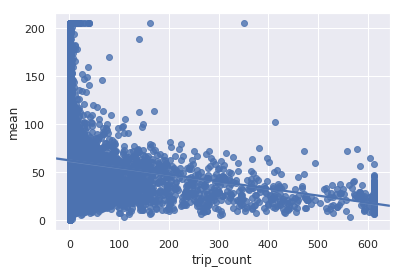

In [22]:
sns.regplot(aggregatedNetworkData["trip_count"].clip(upper=aggregatedNetworkData["trip_count"].quantile(0.95)),
            aggregatedNetworkData["mean"].clip(upper=aggregatedNetworkData["mean"].quantile(0.95)))

/root/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/root/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


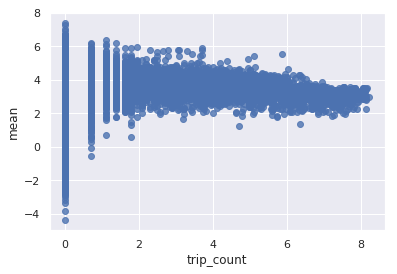

In [23]:
sns.regplot(np.log(aggregatedNetworkData["trip_count"]),
            np.log(aggregatedNetworkData["mean"]),
            line_kws={'color':'red'})

/root/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


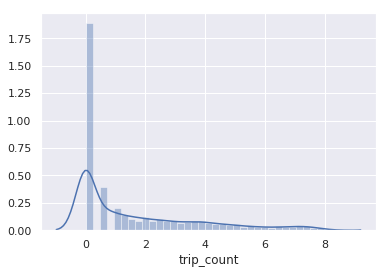

In [24]:
sns.distplot(np.log(aggregatedNetworkData["trip_count"]))

/root/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


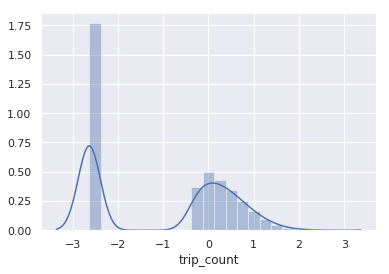

In [25]:
from scipy.special import erfinv

X=aggregatedNetworkData["trip_count"].rank()
X_std= (X - (X.min()-1)) / ((X.max()+1) - (X.min()-1))
X_scaled = X_std * (1 - (-1)) + (-1)
transformed = erfinv( X_scaled )
sns.distplot( transformed )

# Transform the trip count

In [36]:
aggregatedNetworkData["trip_count"].describe()

count    12931.000000
mean        98.627716
std        355.291534
min          1.000000
25%          1.000000
50%          2.000000
75%         16.000000
max       3719.000000
Name: trip_count, dtype: float64

In [35]:
np.log1p(aggregatedNetworkData["trip_count"]).describe()

count    12931.000000
mean         2.042003
std          1.857533
min          0.693147
25%          0.693147
50%          1.098612
75%          2.833213
max          8.221479
Name: trip_count, dtype: float64

/root/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


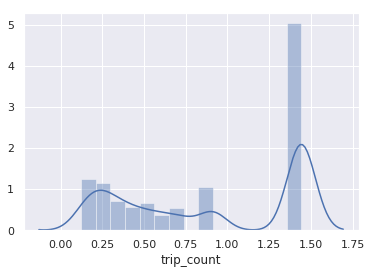

In [26]:
sns.distplot(1/np.log1p(aggregatedNetworkData["trip_count"]))

In [28]:
aggregatedNetworkData["path_popularity"]=1/np.log1p(aggregatedNetworkData["trip_count"])

In [30]:
aggregatedNetworkData.to_csv("TripNetworkData.csv",index=False)

In [45]:
# nx.draw(G)
# labels = nx.get_node_attributes(G,'weight')
# nx.draw_networkx(G, pos=pos)
# nx.draw_networkx_edge_labels(G, pos=pos)
# plt.figure(figsize=(15,15))
# pos=nx.spring_layout(G,k=0.5,weight='weight')
# labels = nx.get_edge_attributes(G,'weight')
# nx.draw(G,pos,node_color='#A0CBE2',edge_color='#BB0000',width=2,edge_cmap=plt.cm.Blues,with_labels=True)
# plt.show()

In [50]:
aggregatedData=joinedSGGeo.groupby(["REGION_N","id","trj_id"]).agg({"pingtimestamp":["min","max","mean"]})

aggregatedData.columns = ["time_min","time_max","time_mean"]

aggregatedData=aggregatedData.reset_index()

aggregatedData[aggregatedData["trj_id"]=="11501"]